In [ ]:
import pandas as pd
import regex as re
import pickle
import gensim
import pyLDAvis
# from pyLDAvis import gensim

notes = pd.read_csv('../data/notes-2022-02-21.tsv', sep="\t")
ratings = pd.read_csv('../data/ratings-2022-02-21.tsv', sep="\t")
tweets = pd.read_csv('../data/noted-tweets.csv', sep=",")

In [ ]:
print(len(tweets), len(notes), len(ratings))

19503 25402 189744
/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with open('../temp.pickle', 'rb') as handle:
    d = pickle.load(handle)
tweets = d['tweets']

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweets.head()

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,tweetId,username,userId,text,time,link,links,clean_text,word_count,num_links,has_links,polarity,subjectivity,clean_text_as_str
1,1,1355643797280083973,rjnln02,1.629330e+09,@AF632 @alwsbord1 Black Lives Matter is a raci...,2021-01-30 22:27:22,https://twitter.com/rjnln02/status/13556437972...,[],"[af, alwsbord, black, life, matter, racist, do...",132,0,0,-0.083333,0.266667,af alwsbord black life matter racist domestic ...
2,2,1355529775197130753,luscsmoothie,3.075792e+08,@nobelprize To remind u what BLM did. Disquali...,2021-01-30 14:54:17,https://twitter.com/luscsmoothie/status/135552...,[https://t.co/2qDB0db13x],"[nobelprize, remind, u, blm, disqualify, rt, n...",119,1,1,0.000000,0.000000,nobelprize remind u blm disqualify rt nextlama...
3,3,1352754599590035459,DonaldJTrumpJr,3.934437e+07,Donald Trump is the first president in modern ...,2021-01-22 23:06:44,https://twitter.com/DonaldJTrumpJr/status/1352...,[],"[donald, trump, president, modern, history, st...",77,0,0,0.168182,0.377273,donald trump president modern history start ne...
4,4,1356441140959064064,FionaRamshackle,8.664043e+17,@dcexaminer Go get those Antifa bastards! And ...,2021-02-02 03:15:44,https://twitter.com/FionaRamshackle/status/135...,[],"[dcexaminer, antifa, bastard, random, anarchis...",284,0,0,-0.500000,0.500000,dcexaminer antifa bastard random anarchist boo...
5,5,1361810447431827459,DanCrenshawTX,9.305526e+17,This raises the obvious question: can we ever ...,2021-02-16 22:51:26,https://twitter.com/DanCrenshawTX/status/13618...,[],"[raise, obvious, question, rely, renewable, po...",231,0,0,0.003788,0.666667,raise obvious question rely renewable power gr...


In [ ]:
def clean_more(arr):
    arr = [str for str in arr if len(str) >= 3]
    if 'san' in arr and 'francisco' in arr:
        arr.append('san francisco')
        arr.remove("san")
        arr.remove("francisco")
    if 'los' in arr and 'angeles' in arr:
        arr.append('los angeles')
        arr.remove("los")
        arr.remove("angeles")
    
    if 'not' in arr:
        arr.remove('not')
    if 'amp' in arr:
        arr.remove('amp')
    if 'rightwe' in arr:
        arr.remove('rightwe')
    return arr

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweets['clean_text'] = tweets['clean_text'].apply(clean_more)

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweets = tweets[tweets['username'] != 'birdwatch']

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(tweets)

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10489

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
dictionary = corpora.Dictionary(tweets['clean_text'])

# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in tweets['clean_text']]

# View
print(corpus[:1][0][:30])

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [ ]:
from pprint import pprint
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0,
  '0.016*"people" + 0.015*"covid" + 0.011*"trump" + 0.007*"biden" + '
  '0.007*"vaccine" + 0.007*"death" + 0.007*"work" + 0.007*"know" + 0.006*"say" '
  '+ 0.006*"america"'),
 (1,
  '0.012*"people" + 0.011*"covid" + 0.010*"biden" + 0.009*"vaccine" + '
  '0.007*"president" + 0.007*"trump" + 0.006*"risk" + 0.005*"earthquake" + '
  '0.005*"joe" + 0.005*"need"'),
 (2,
  '0.022*"mask" + 0.016*"vaccine" + 0.012*"covid" + 0.012*"wear" + '
  '0.011*"people" + 0.009*"fauci" + 0.009*"take" + 0.006*"shot" + '
  '0.006*"kneel" + 0.006*"biden"'),
 (3,
  '0.019*"trump" + 0.011*"afghanistan" + 0.010*"election" + 0.007*"win" + '


In [ ]:
# !pip install pyLDAvis.gensim

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim_models as gensimvis

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()

filepath = 'ldavis_prepared_'+str(num_topics)

if True:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, dictionary)
    with open(filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, filepath +'.html')

LDAvis_prepared

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.118803 -0.034703       1        1  14.147413
0      0.045397 -0.008532       2        1  12.922299
1      0.026800 -0.030234       3        1  12.632340
5      0.007299  0.034528       4        1  11.428991
6     -0.009414  0.042841       5        1   9.548437
7     -0.010077  0.061691       6        1   9.253716
3     -0.058686  0.091064       7        1   8.713097
8     -0.077749  0.037677       8        1   8.407096
2      0.084219 -0.048547       9        1   7.252871
4     -0.126592 -0.145786      10        1   5.693741, topic_info=               Term         Freq        Total Category  logprob  loglift
102      earthquake   393.000000   393.000000  Default  30.0000  30.0000
104          likely   415.000000   415.000000  Default  29.0000  29.0000
205         vaccine  1108.000000  1108.000000  Default  28.0000  28.0000
726            mask   448.000000   448.000000  Default  27.0000  27.0000
3680  san francisco   159.000000   159.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
200            want    30.155452   423.274195  Topic10  -5.4893   0.2241
2364       positive    20.035031    73.188781  Topic10  -5.8982   1.5702
44           people    31.109455  1148.185815  Topic10  -5.4582  -0.7426
164             day    23.917322   339.200942  Topic10  -5.7211   0.2138
168             lie    20.845616   247.836538  Topic10  -5.8585   0.3902

[789 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5094      1  0.036715  abbott
5094      2  0.036715  abbott
5094      3  0.036715  abbott
5094      6  0.110145  abbott
5094      7  0.734297  abbott
...     ...       ...     ...
407       6  0.010184     you
407       7  0.397185     you
407       8  0.040737     you
407       9  0.071290     you
407      10  0.010184     you

[2604 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 2, 6, 7, 8, 4, 9, 3, 5])

## Unfinished Explorations

Suspiciously common vector analysis

In [ ]:
# nums = '0.5165612 -0.2748843 0.23414916 -0.03353653 0.14822118 -0.2140591 -0.273715 0.31182715 -0.28392965 0.03833102 0.71412915 -0.12623966 0.01060359 -0.22177511 -0.48231328 0.29029948 0.19768755 0.23107074 -0.6973527 -0.02526714 -0.32837042 0.12478355 0.01376466 -0.16914183 0.3283727 -0.45044652 0.17814918 -0.49533963 0.1848702 -0.14078267 0.21354735 0.33570722 -0.16036382 -0.24869299 0.11315513 -0.35369763 -0.1663535 0.5083657 -0.04987437 0.4141711 0.10442343 0.41257355 -0.41149414 0.26209757 0.26663744 -0.21748962 0.08647469 -0.06590172 -0.24378727 -0.27255812 0.5440032 -0.27095118 -0.1553473 0.0673851 -0.03265667 -0.22625995 0.43378648 -0.0917755 0.10038939 0.04093109 0.349573 -0.41145465 0.2382577 -0.36835834 0.02527652 -0.21686192 -0.7478197 0.04894651 -0.07372946 0.07308427 0.12849472 0.21438135 -0.24230045 -0.23281254 -0.04018355 0.17432278 0.01564372 -0.08756901 -0.4357647 0.07869332 0.11019602 0.4734359 0.3662394 0.40063536 -0.2054153 -0.12328431 -0.03628931 -0.60807943 0.04818559 0.3079439 -0.5035178 0.02922824 0.45156133 -0.10860304 -0.133015 0.27818713'

nums = '0.5165612 -0.2748843 0.23414916 -0.03353653 0.14822118 -0.2140591 -0.273715 0.31182715 -0.28392965 0.03833102 0.71412915 -0.12623966 0.01060359 -0.22177511 -0.48231328 0.29029948 0.19768755 0.23107074 -0.6973527 -0.02526714 -0.32837042 0.12478355 0.01376466 -0.16914183 0.3283727 -0.45044652 0.17814918 -0.49533963 0.1848702 -0.14078267 0.21354735 0.33570722 -0.16036382 -0.24869299 0.11315513 -0.35369763 -0.1663535 0.5083657 -0.04987437 0.4141711 0.10442343 0.41257355 -0.41149414 0.26209757 0.26663744 -0.21748962 0.08647469 -0.06590172 -0.24378727 -0.27255812 0.5440032 -0.27095118 -0.1553473 0.0673851 -0.03265667 -0.22625995 0.43378648 -0.0917755 0.10038939 0.04093109 0.349573 -0.41145465 0.2382577 -0.36835834 0.02527652 -0.21686192 -0.7478197 0.04894651 -0.07372946 0.07308427 0.12849472 0.21438135 -0.24230045 -0.23281254 -0.04018355 0.17432278 0.01564372 -0.08756901 -0.4357647 0.07869332 0.11019602 0.4734359 0.3662394 0.40063536 -0.2054153 -0.12328431 -0.03628931 -0.60807943 0.04818559 0.3079439 -0.5035178 0.02922824 0.45156133 -0.10860304 -0.133015 0.27818713'.split()
nums = [float(x) for x in nums]

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def my_helpful_vector_comparison(row):
    try:
        return np.allclose(row.vector, nums)
    except:
        return False

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
suspicious_vector_mask = X_notes.apply(axis=1, func=my_helpful_vector_comparison)
suspicious_vector_mask

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'X_notes' is not defined

In [ ]:
X_notes[suspicious_vector_mask]

In [ ]:
notes.merge(X_notes[suspicious_vector_mask], left_on='noteId', right_index=True)

Look at empty tweets.


In [ ]:
test = X_notes[X_notes['vector'].apply(lambda x: len(x) == 0)]

In [ ]:
X_notes['vector'].apply(lambda x: len(x)).value_counts()

In [ ]:
test.merge(notes, left_index=True, right_on='noteId')

In [ ]:
import pandas as pd
notes = pd.read_csv('notes-2.tsv', sep="\t")
ratings = pd.read_csv('ratings-2.tsv', sep="\t")

In [ ]:
ratings.head()


,noteId,participantId,createdAtMillis,version,agree,disagree,helpful,notHelpful,helpfulnessLevel,helpfulOther,...,notHelpfulIncorrect,notHelpfulSourcesMissingOrUnreliable,notHelpfulOpinionSpeculationOrBias,notHelpfulMissingKeyPoints,notHelpfulOutdated,notHelpfulHardToUnderstand,notHelpfulArgumentativeOrInflammatory,notHelpfulOffTopic,notHelpfulSpamHarassmentOrAbuse,notHelpfulIrrelevantSources
0,1352796878438424576,7585B8804A32416E91E51837F351F249,1611388222120,1,1,0,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,1352796878438424576,7644DF3FD853416F0C96933CCC1BA9B7,1611796572477,1,0,1,0,1,NaN,0,...,0,0,0,0,0,0,0,0,1,0
2,1352796878438424576,EFD7E04E740224D2DDB42A2C910B62C1,1611852744990,1,1,0,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,1352796878438424576,3C9A15EEA8FD238754BE28C15B26709A,1611673955881,1,1,0,0,1,NaN,0,...,0,1,0,0,0,0,0,0,0,0
4,1352796878438424576,0466BA47B23AAAB301AA767C4C780E8D,1611523319844,1,1,0,1,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0


## Tweet Response Rundown

In [ ]:
tweets['username'].value_counts().nlargest(21)

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quakeprediction    379
earthquakejapan    158
mtgreenee          154
NotAlexSheppard    105
laurenboebert       83
dioncini            68
Chicago1Ray         62
thehill             58
EmeraldRobinson     49
POTUS               46
JackPosobiec        44
AOC                 39
AlexBerenson        37
EWoodhouse7         37
Jim_Jordan          34
realLizUSA          34
RealCandaceO        34
McKaylaRoseJ        33
P8R1OT              33
atrupar             30
DonaldJTrumpJr      30
Name: username, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

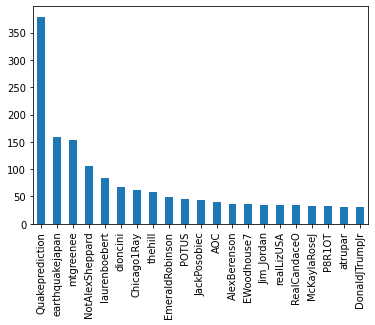

In [ ]:
tweets['username'].value_counts().nlargest(21).plot.bar()

In [ ]:
tweets[tweets.clean_text.apply(helper)]

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'list' object has no attribute 'contains'

In [ ]:
def helper(arr):
    return 'rightwe' in arr

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tweets['mask'] = tweets['clean_text'].apply(helper)

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(tweets[tweets['mask'] == True].clean_text.iloc[0])
print(tweets[tweets['mask'] == True].text.iloc[0])

['antisemitism', 'rise', 'truly', 'wokeness', 'contain', 'leftwe', 'antisemitism', 'normal', 'rightwing', 'antisemitism', 'flare', 'condition', 'identity', 'politic', 'extra', 'rightwe', 'antisemitism', 'arise', 'lot', 'progressive', 'jews', 'nonsensically', 'woke']
Anti-Semitism is on the rise again, truly. Wokeness contains left-wing anti-Semitism. Normal right-wing anti-Semitism is flared up because of conditions and identity politics. Extra right-wing anti-Semitism is arising because lots of progressive Jews are nonsensically Woke.
/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(tweets)

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11326

In [ ]:
tweets[tweets.username == 'birdwatch']

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,tweetId,username,userId,text,time,link,links,clean_text,word_count,num_links,has_links,polarity,subjectivity,clean_text_as_str
10,10,1370127482641260544,birdwatch,1.319037e+18,If you want to add helpful context to any Twee...,2021-03-11 21:40:22,https://twitter.com/birdwatch/status/137012748...,[https://t.co/fk57uFse7E],"[want, add, helpful, context, tweet, mislead, ...",144,1,1,0.00,0.50,want add helpful context tweet mislead open me...
21,21,1362116397673799681,birdwatch,1.319037e+18,@ngerakines Welcome to Birdwatch! 🎉 You can no...,2021-02-17 19:07:10,https://twitter.com/birdwatch/status/136211639...,[https://t.co/ldtHFVYFZv],"[ngerakine, welcome, birdwatch, add, context, ...",217,1,1,0.80,0.90,ngerakine welcome birdwatch add context tweet ...
24,24,1387842855519997954,birdwatch,1.319037e+18,If you want to add helpful context to any Twee...,2021-04-29 18:54:56,https://twitter.com/birdwatch/status/138784285...,[https://t.co/fk57uFse7E],"[want, add, helpful, context, tweet, mislead, ...",144,1,1,0.00,0.50,want add helpful context tweet mislead open me...
30,30,1357421548269756418,birdwatch,1.319037e+18,If you want to add helpful context to any Twee...,2021-02-04 20:11:31,https://twitter.com/birdwatch/status/135742154...,[https://t.co/fk57uFse7E],"[want, add, helpful, context, tweet, mislead, ...",144,1,1,0.00,0.50,want add helpful context tweet mislead open me...
37,37,1354861396891033602,birdwatch,1.319037e+18,@ginevra Welcome to Birdwatch! 🎉 You can now h...,2021-01-28 18:38:23,https://twitter.com/birdwatch/status/135486139...,[https://t.co/ldtHFVYFZv],"[ginevra, welcome, birdwatch, help, identify, ...",202,1,1,0.80,0.90,ginevra welcome birdwatch help identify add va...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11667,64,1404846965431554050,birdwatch,1.319037e+18,If you want to add helpful context to any Twee...,2021-06-15 17:03:12+00:00,https://twitter.com/birdwatch/status/140484696...,[https://t.co/fk57uFse7E],"[want, add, helpful, context, tweet, mislead, ...",144,1,1,0.00,0.50,want add helpful context tweet mislead open me...
11762,59,1428163517232947202,birdwatch,1.319037e+18,Everything’s back to normal ✨,2021-08-19 01:14:51+00:00,https://twitter.com/birdwatch/status/142816351...,[],"[everything, normal]",26,0,0,0.15,0.65,everything normal
11804,1,1404846716709261322,birdwatch,1.319037e+18,@deepseaposter Welcome to Birdwatch! 🎉 You can...,2021-06-15 17:02:12+00:00,https://twitter.com/birdwatch/status/140484671...,[https://t.co/ldtHFVYFZv],"[deepseaposter, welcome, birdwatch, add, conte...",220,1,1,0.80,0.90,deepseaposter welcome birdwatch add context tw...
11899,96,1387842566976991235,birdwatch,1.319037e+18,If you want to add helpful context to any Twee...,2021-04-29 18:53:47+00:00,https://twitter.com/birdwatch/status/138784256...,[https://t.co/fk57uFse7E],"[want, add, helpful, context, tweet, mislead, ...",144,1,1,0.00,0.50,want add helpful context tweet mislead open me...


In [ ]:
len(tweets[tweets.username.isnull()])

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2299

In [ ]:
notes.columns

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['noteId', 'participantId', 'createdAtMillis', 'tweetId',
       'classification', 'believable', 'harmful', 'validationDifficulty',
       'misleadingOther', 'misleadingFactualError',
       'misleadingManipulatedMedia', 'misleadingOutdatedInformation',
       'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact',
       'misleadingSatire', 'notMisleadingOther',
       'notMisleadingFactuallyCorrect',
       'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire',
       'notMisleadingPersonalOpinion', 'trustworthySources', 'summary'],
      dtype='object')

In [ ]:
len(ratings.columns)

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31

In [ ]:
ratings.columns

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['noteId', 'participantId', 'createdAtMillis', 'version', 'agree',
       'disagree', 'helpful', 'notHelpful', 'helpfulnessLevel', 'helpfulOther',
       'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic',
       'helpfulGoodSources', 'helpfulUniqueContext', 'helpfulAddressesClaim',
       'helpfulImportantContext', 'helpfulUnbiasedLanguage', 'notHelpfulOther',
       'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable',
       'notHelpfulOpinionSpeculationOrBias', 'notHelpfulMissingKeyPoints',
       'notHelpfulOutdated', 'notHelpfulHardToUnderstand',
       'notHelpfulArgumentativeOrBiased', 'notHelpfulOffTopic',
       'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources',
       'notHelpfulOpinionSpeculation', 'notHelpfulNoteNotNeeded'],
      dtype='object')

In [ ]:
ratings.version

/shared-libs/python3.8/py-core/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1
1         1
2         1
3         1
4         1
         ..
189739    2
189740    2
189741    2
189742    2
189743    2
Name: version, Length: 189744, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0e62a2c-7f45-414e-8164-5bf51e09d482' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>